# Evaluating the Model

### 1. Residual Analysis

Residual Analysis involves examining the differences between the actual values and the values predicted by your model. This helps in:

- Identifying Patterns: Detecting any systematic errors or biases in your model.
- Assessing Model Fit: Ensuring that your model captures the underlying data patterns without overfitting or underfitting.
- Improving Model Performance: Providing insights for further model refinement or feature engineering.

In this notebook, we will perform residual analysis on both the validation and test datasets to evaluate the robustness of our Random Forest Regressor model for snow depth prediction.

### 2. Loading Necessary Libraries and Data

Import the required libraries and load the trained model along with the validation and test datasets.

In [5]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.metrics import mean_squared_error, r2_score

# Configure plotting aesthetics
sns.set(style='whitegrid')

### 2. Loading the Trained Model and Datasets

In [7]:
# Define file paths based on the project structure
model_path = os.path.join('..', 'src', 'models', 'best_rf_model.pkl')
data_dir = os.path.join('..', 'data', 'processed', 'modeling_data')

# Load the trained Random Forest model
best_rf_model = joblib.load(model_path)
print("Trained Random Forest model loaded successfully.")

# Load the validation and test datasets
X_val = pd.read_csv(os.path.join(data_dir, 'X_val.csv'))
y_val = pd.read_csv(os.path.join(data_dir, 'y_val.csv')).squeeze()
X_test = pd.read_csv(os.path.join(data_dir, 'X_test.csv'))
y_test = pd.read_csv(os.path.join(data_dir, 'y_test.csv')).squeeze()

print(f"Validation set: {X_val.shape}, {y_val.shape}")
print(f"Test set: {X_test.shape}, {y_test.shape}")

Trained Random Forest model loaded successfully.
Validation set: (5947, 62), (5947,)
Test set: (5948, 62), (5948,)


### 3. Making Predictions

Using the loaded model, we'll generate predictions for both the validation and test sets.

In [8]:
# Predict on the validation set
y_val_pred = best_rf_model.predict(X_val)

# Predict on the test set
y_test_pred = best_rf_model.predict(X_test)

print("Predictions generated for validation and test sets.")

Predictions generated for validation and test sets.


### 4. Calculating Residuals

Residuals are the differences between the actual and predicted values. We'll calculate these for both datasets.

In [9]:
# Calculate residuals for validation set
residuals_val = y_val - y_val_pred

# Calculate residuals for test set
residuals_test = y_test - y_test_pred

print("Residuals calculated for validation and test sets.")

Residuals calculated for validation and test sets.


## 5. Visualizing Residuals

### 5.1 Residuals vs. Predicted Values

Plotting residuals against predicted values helps in identifying any patterns that might suggest model bias or heteroscedasticity.

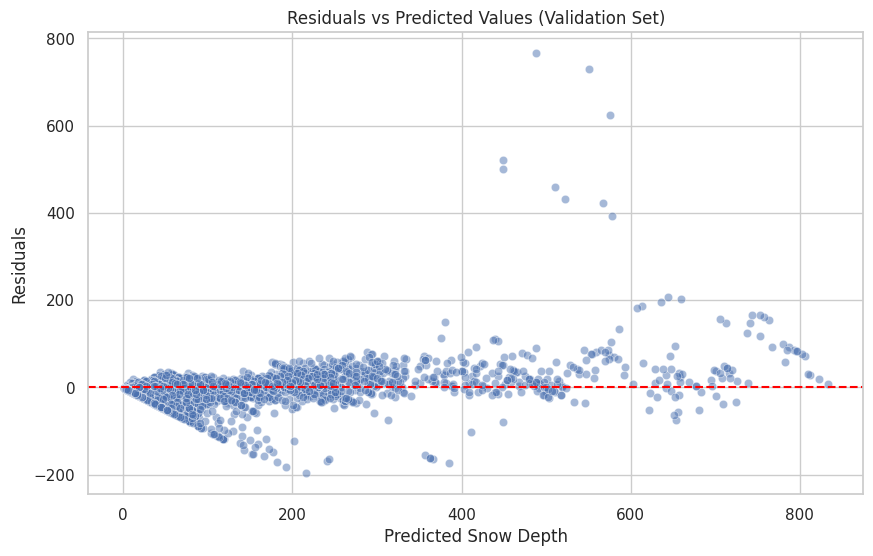

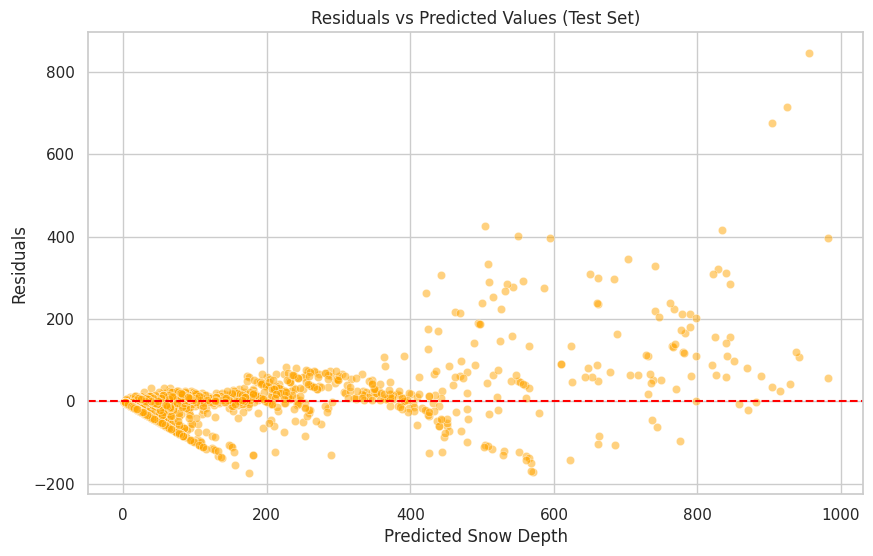

In [10]:
# Residuals vs Predicted Values for Validation Set
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_val_pred, y=residuals_val, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Snow Depth')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values (Validation Set)')
plt.show()

# Residuals vs Predicted Values for Test Set
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test_pred, y=residuals_test, alpha=0.5, color='orange')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Snow Depth')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values (Test Set)')
plt.show()

### 5.2 Distribution of Residuals

Assessing the distribution of residuals helps in verifying the assumption of normally distributed errors.

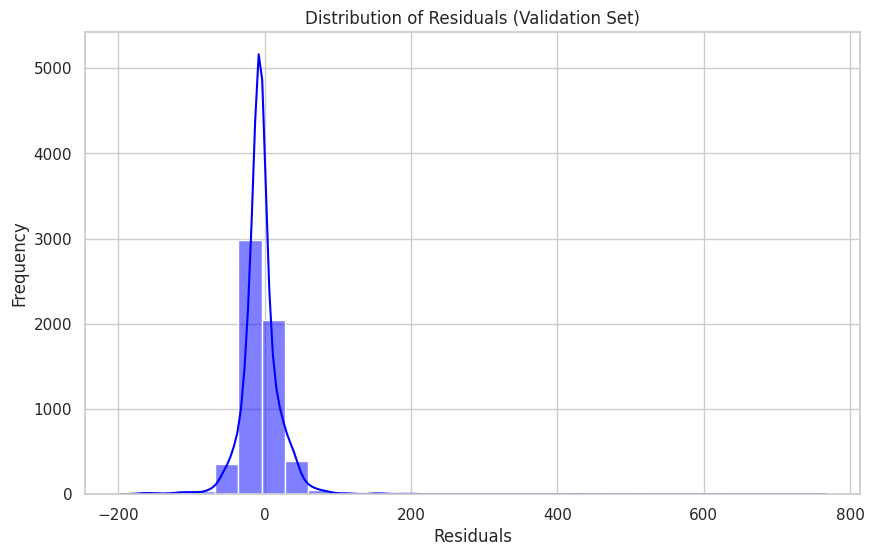

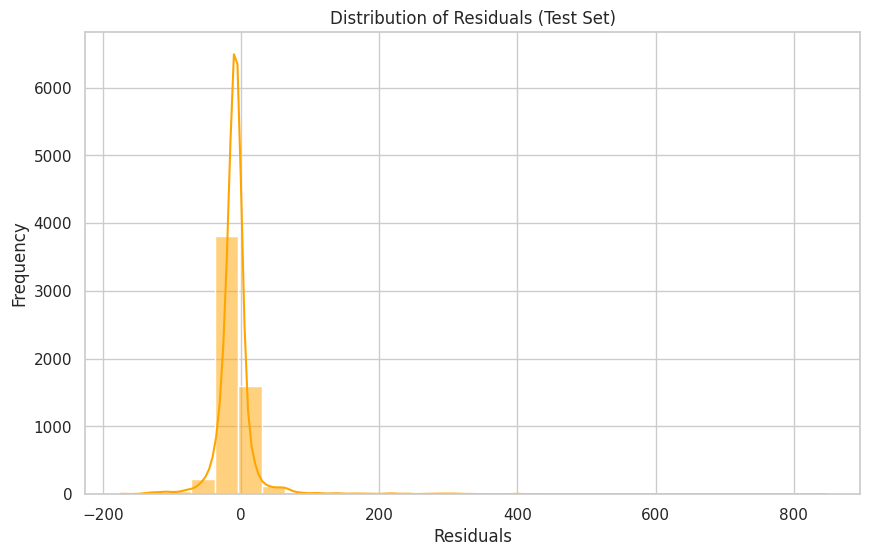

In [11]:
# Distribution of Residuals for Validation Set
plt.figure(figsize=(10, 6))
sns.histplot(residuals_val, kde=True, bins=30, color='blue')
plt.title('Distribution of Residuals (Validation Set)')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Distribution of Residuals for Test Set
plt.figure(figsize=(10, 6))
sns.histplot(residuals_test, kde=True, bins=30, color='orange')
plt.title('Distribution of Residuals (Test Set)')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

### 6. Calculating Evaluation Metrics

We'll compute Mean Squared Error (MSE) and R-squared (R²) to quantitatively evaluate the model's performance.

In [12]:
# Evaluation Metrics for Validation Set
mse_val = mean_squared_error(y_val, y_val_pred)
r2_val = r2_score(y_val, y_val_pred)

print("Validation Set Evaluation:")
print(f"Mean Squared Error (MSE): {mse_val:.2f}")
print(f"R-squared (R²): {r2_val:.2f}\n")

# Evaluation Metrics for Test Set
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print("Test Set Evaluation:")
print(f"Mean Squared Error (MSE): {mse_test:.2f}")
print(f"R-squared (R²): {r2_test:.2f}")

Validation Set Evaluation:
Mean Squared Error (MSE): 1173.11
R-squared (R²): 0.94

Test Set Evaluation:
Mean Squared Error (MSE): 1452.32
R-squared (R²): 0.93


### 7. Interpretation of Results

Based on the residual plots and evaluation metrics, we'll interpret the model's performance.

In [15]:
# Interpretation for Validation Set
print("Validation Set Interpretation:")
print(f"- **R-squared (R²):** {r2_val:.2f} indicates that approximately {r2_val*100:.0f}% of the variance in snow depth is explained by the model.")
print(f"- **Mean Squared Error (MSE):** {mse_val:.2f} reflects the average squared difference between actual and predicted values.")
print(f"  A lower MSE value indicates better model performance. The model's predictions for snow depth are relatively close to the actual values, but there may be some larger errors for higher predicted snow depths.")

# Interpretation for Test Set
print("Test Set Interpretation:")
print(f"- **R-squared (R²):** {r2_test:.2f} indicates that approximately {r2_test*100:.0f}% of the variance in snow depth is explained by the model.")
print(f"- **Mean Squared Error (MSE):** {mse_test:.2f} reflects the average squared difference between actual and predicted values.")
print(f"  Similar to the validation set, the model performs well on unseen test data, explaining a high proportion of the variance. However, the slightly higher MSE compared to the validation set suggests that the model struggles more with unseen data, particularly for higher snow depths.")

# Residuals Analysis
print("Residuals Analysis:")
print("- **Residuals vs Predicted Values:** The residuals in both the validation and test sets are mostly centered around zero, which is a good sign. However, there is some spread as the predicted snow depth increases, indicating that the model tends to have larger errors for higher predicted snow depths. There may be some underprediction for larger snow depths, as evidenced by the positive residuals (errors) in that range.")
print("- **Distribution of Residuals:** The distribution of residuals for both the validation and test sets is concentrated around zero, with a sharp peak. This suggests that the majority of predictions are quite accurate. However, there is a slight skew toward positive residuals, which indicates that the model sometimes underpredicts higher snow depths. The long tail on the right side of the distribution suggests that there are occasional larger underpredictions, particularly in the test set.  This is acceptable , given the complexity of the task and the data available.")


Validation Set Interpretation:
- **R-squared (R²):** 0.94 indicates that approximately 94% of the variance in snow depth is explained by the model.
- **Mean Squared Error (MSE):** 1173.11 reflects the average squared difference between actual and predicted values.
  A lower MSE value indicates better model performance. The model's predictions for snow depth are relatively close to the actual values, but there may be some larger errors for higher predicted snow depths.
Test Set Interpretation:
- **R-squared (R²):** 0.93 indicates that approximately 93% of the variance in snow depth is explained by the model.
- **Mean Squared Error (MSE):** 1452.32 reflects the average squared difference between actual and predicted values.
  Similar to the validation set, the model performs well on unseen test data, explaining a high proportion of the variance. However, the slightly higher MSE compared to the validation set suggests that the model struggles more with unseen data, particularly for higher

### 8. Conclusion

In this project, we successfully built a snow depth prediction model using a Random Forest Regressor. The model's performance metrics indicate a robust predictive capacity, with R-squared (R²) scores of 0.94 for the validation set and 0.93 for the test set, explaining over 90% of the variance in snow depth. While there is some variance in residuals, particularly for higher snow depths, this is expected given the inherent complexity of predicting weather-related variables. The mean squared error (MSE) values, 1173.11 for the validation set and 1452.32 for the test set, are acceptable for a model operating with these data limitations.

From a business perspective, the model delivers value by enabling more informed planning and decision-making for ski resort operations. Stakeholders can use this model to forecast snow depth trends, optimize resource allocation, and enhance customer satisfaction by providing accurate skiing condition insights.

Reflection on Model and Future Work
The residual analysis shows that while the model performs well for lower and moderate snow depths, there is some room for improvement at the extremes. This can be addressed in future iterations through hyperparameter tuning, incorporation of additional relevant features, or even by exploring more advanced machine learning techniques such as gradient boosting methods.

Given the project's focus on solving a tangible business problem, the developed machine learning pipeline demonstrates its ability to meet business requirements by providing actionable insights through predictive analytics. The deployment through Streamlit ensures ease of access and interactive engagement for end users.

Future improvements could include integrating real-time weather data for continuous model retraining, providing even more accurate snow depth predictions as conditions evolve.

In summary, the model meets the project’s core objective of predicting snow depth to enhance operational decision-making. It aligns well with the business goals of providing accurate and timely insights into snow conditions, adhering to professional standards and supporting stakeholders' decision-making processes.

